In [1]:
#Number Recognition : Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

In [2]:
!pip install numpy

In [3]:
!pip install tensorflow

In [4]:
!pip install matplotlib

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [7]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# Build a neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1458 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9720
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9758


In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - loss: 0.0820 - accuracy: 0.9756 - 459ms/epoch - 1ms/step
Test accuracy: 0.975600004196167


In [12]:
# Function to recognize a handwritten digit
def recognize_digit(image):
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    digit_class = np.argmax(predictions)
    return digit_class

In [13]:
# Function to display an image and its recognized digit
def display_image_with_prediction(image, predicted_digit):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [14]:
# Replace 'input_image' with your image data
input_image = test_images[0]  # You can replace this with your own image

1/1 [==============================] - 0s 81ms/step


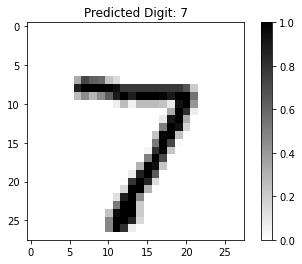

In [15]:
predicted_digit = recognize_digit(input_image)
display_image_with_prediction(input_image, predicted_digit)